In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv(r"dataset_Facebook.csv",sep = ';')
data.drop(columns = 'Type',inplace = True) 
data.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [6]:
rs = RobustScaler()
scaled = pd.DataFrame(rs.fit_transform(data),columns = data.columns)
scaled.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0.414934,0.0,0.833333,0.00,-0.750,0.0,-0.256673,-0.241600,-0.669660,-0.710273,-0.725557,-0.291761,-0.305984,-0.802190,0.166667,-0.167939,-0.089888,-0.149206
1,0.414934,0.0,0.833333,-0.25,0.125,0.0,0.525627,0.610466,1.244295,1.299358,0.862910,0.500838,0.464055,1.905544,0.333333,0.221374,0.449438,0.257143
2,0.414934,0.5,0.833333,-0.25,-0.750,0.0,-0.291079,-0.285405,-0.671156,-0.703852,-0.730799,-0.316186,-0.329574,-0.766598,-0.500000,-0.267176,-0.224719,-0.276190
3,0.414934,0.0,0.833333,-0.50,0.125,1.0,4.551609,4.816131,2.372615,0.382825,0.280996,5.029176,4.930004,2.666667,9.166667,11.229008,5.752809,10.498413
4,0.414934,0.0,0.833333,-0.50,-0.750,0.0,0.199229,0.277169,0.068088,-0.227127,-0.284142,-0.002525,-0.037365,-0.043806,2.666667,1.709924,1.348315,1.711111


In [7]:
scaled_data = scaled.dropna()
pca = PCA() 
pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)

[5.69307134e-01 2.32514132e-01 7.34806201e-02 5.53047747e-02
 2.27261194e-02 1.32419319e-02 8.32595826e-03 7.89336049e-03
 4.52155952e-03 3.27120138e-03 2.70459775e-03 2.40323733e-03
 1.88208499e-03 1.33977504e-03 8.75294938e-04 1.97005986e-04
 1.12125738e-05 1.16335547e-32]


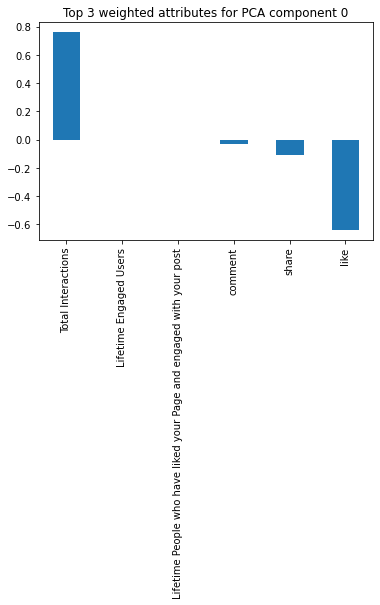

Total Interactions                                                     0.76
Lifetime Engaged Users                                                -0.00
Lifetime People who have liked your Page and engaged with your post    0.00
comment                                                               -0.03
share                                                                 -0.11
like                                                                  -0.64
Name: 17, dtype: float64

In [10]:
def feature_weight(pca, n_comp, n_feat):
    #df = pd.DataFrame(np.round(pca.components_,2),columns = scaled_data.columns)
    comp = pd.DataFrame(np.round(pca.components_, 2), columns=scaled_data.keys()).iloc[n_comp - 1]
    comp.sort_values(ascending=False, inplace=True)
    comp = pd.concat([comp.head(n_feat), comp.tail(n_feat)])
    comp.plot(kind='bar', title='Top {} weighted attributes for PCA component {}'.format(n_feat, n_comp))
    plt.show()
    return comp
feature_weight(pca,0,3)

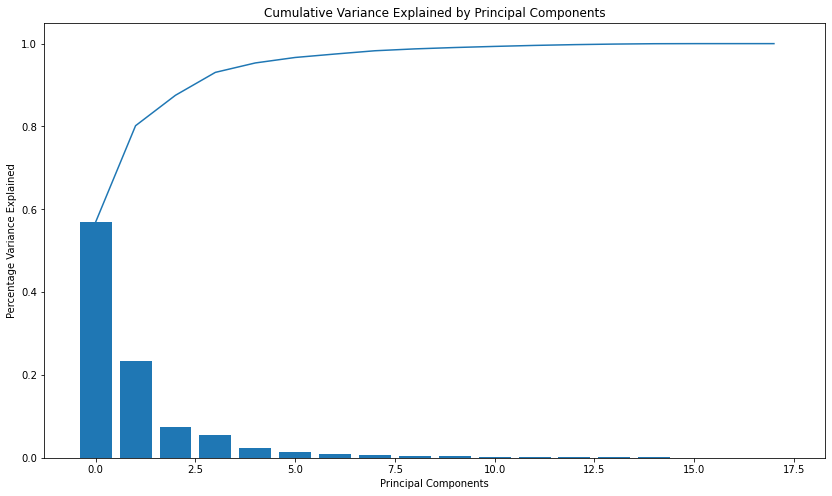

In [11]:
def screeplot(pca):
    var_len = len(pca.explained_variance_ratio_)
    indx = np.arange(var_len)
    var_pca = pca.explained_variance_ratio_
    plt.figure(figsize=(14, 8))
    ax = plt.subplot()
    cum_var = np.cumsum(var_pca)
    ax.bar(indx, var_pca)
    ax.plot(indx, cum_var)
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Percentage Variance Explained")
    plt.title('Cumulative Variance Explained by Principal Components')
screeplot(pca)